### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
import pandas as pd
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.isna().sum()
#There are many NAs as showing in the below result. These are to be dropped in the next statement.

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
#All NAs are dropped from the DataFrame
vehicle_df = vehicle_df.dropna()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [13]:
vehicle_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [14]:
# All NAs are already dropped in the previous steps. Hence not executing any steps for this.
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [33]:
vehicle_df1 = vehicle_df.drop(['class'],axis=1)
from scipy.stats import zscore
vehicle_df_z = vehicle_df1.apply(zscore)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [57]:
distortion = []

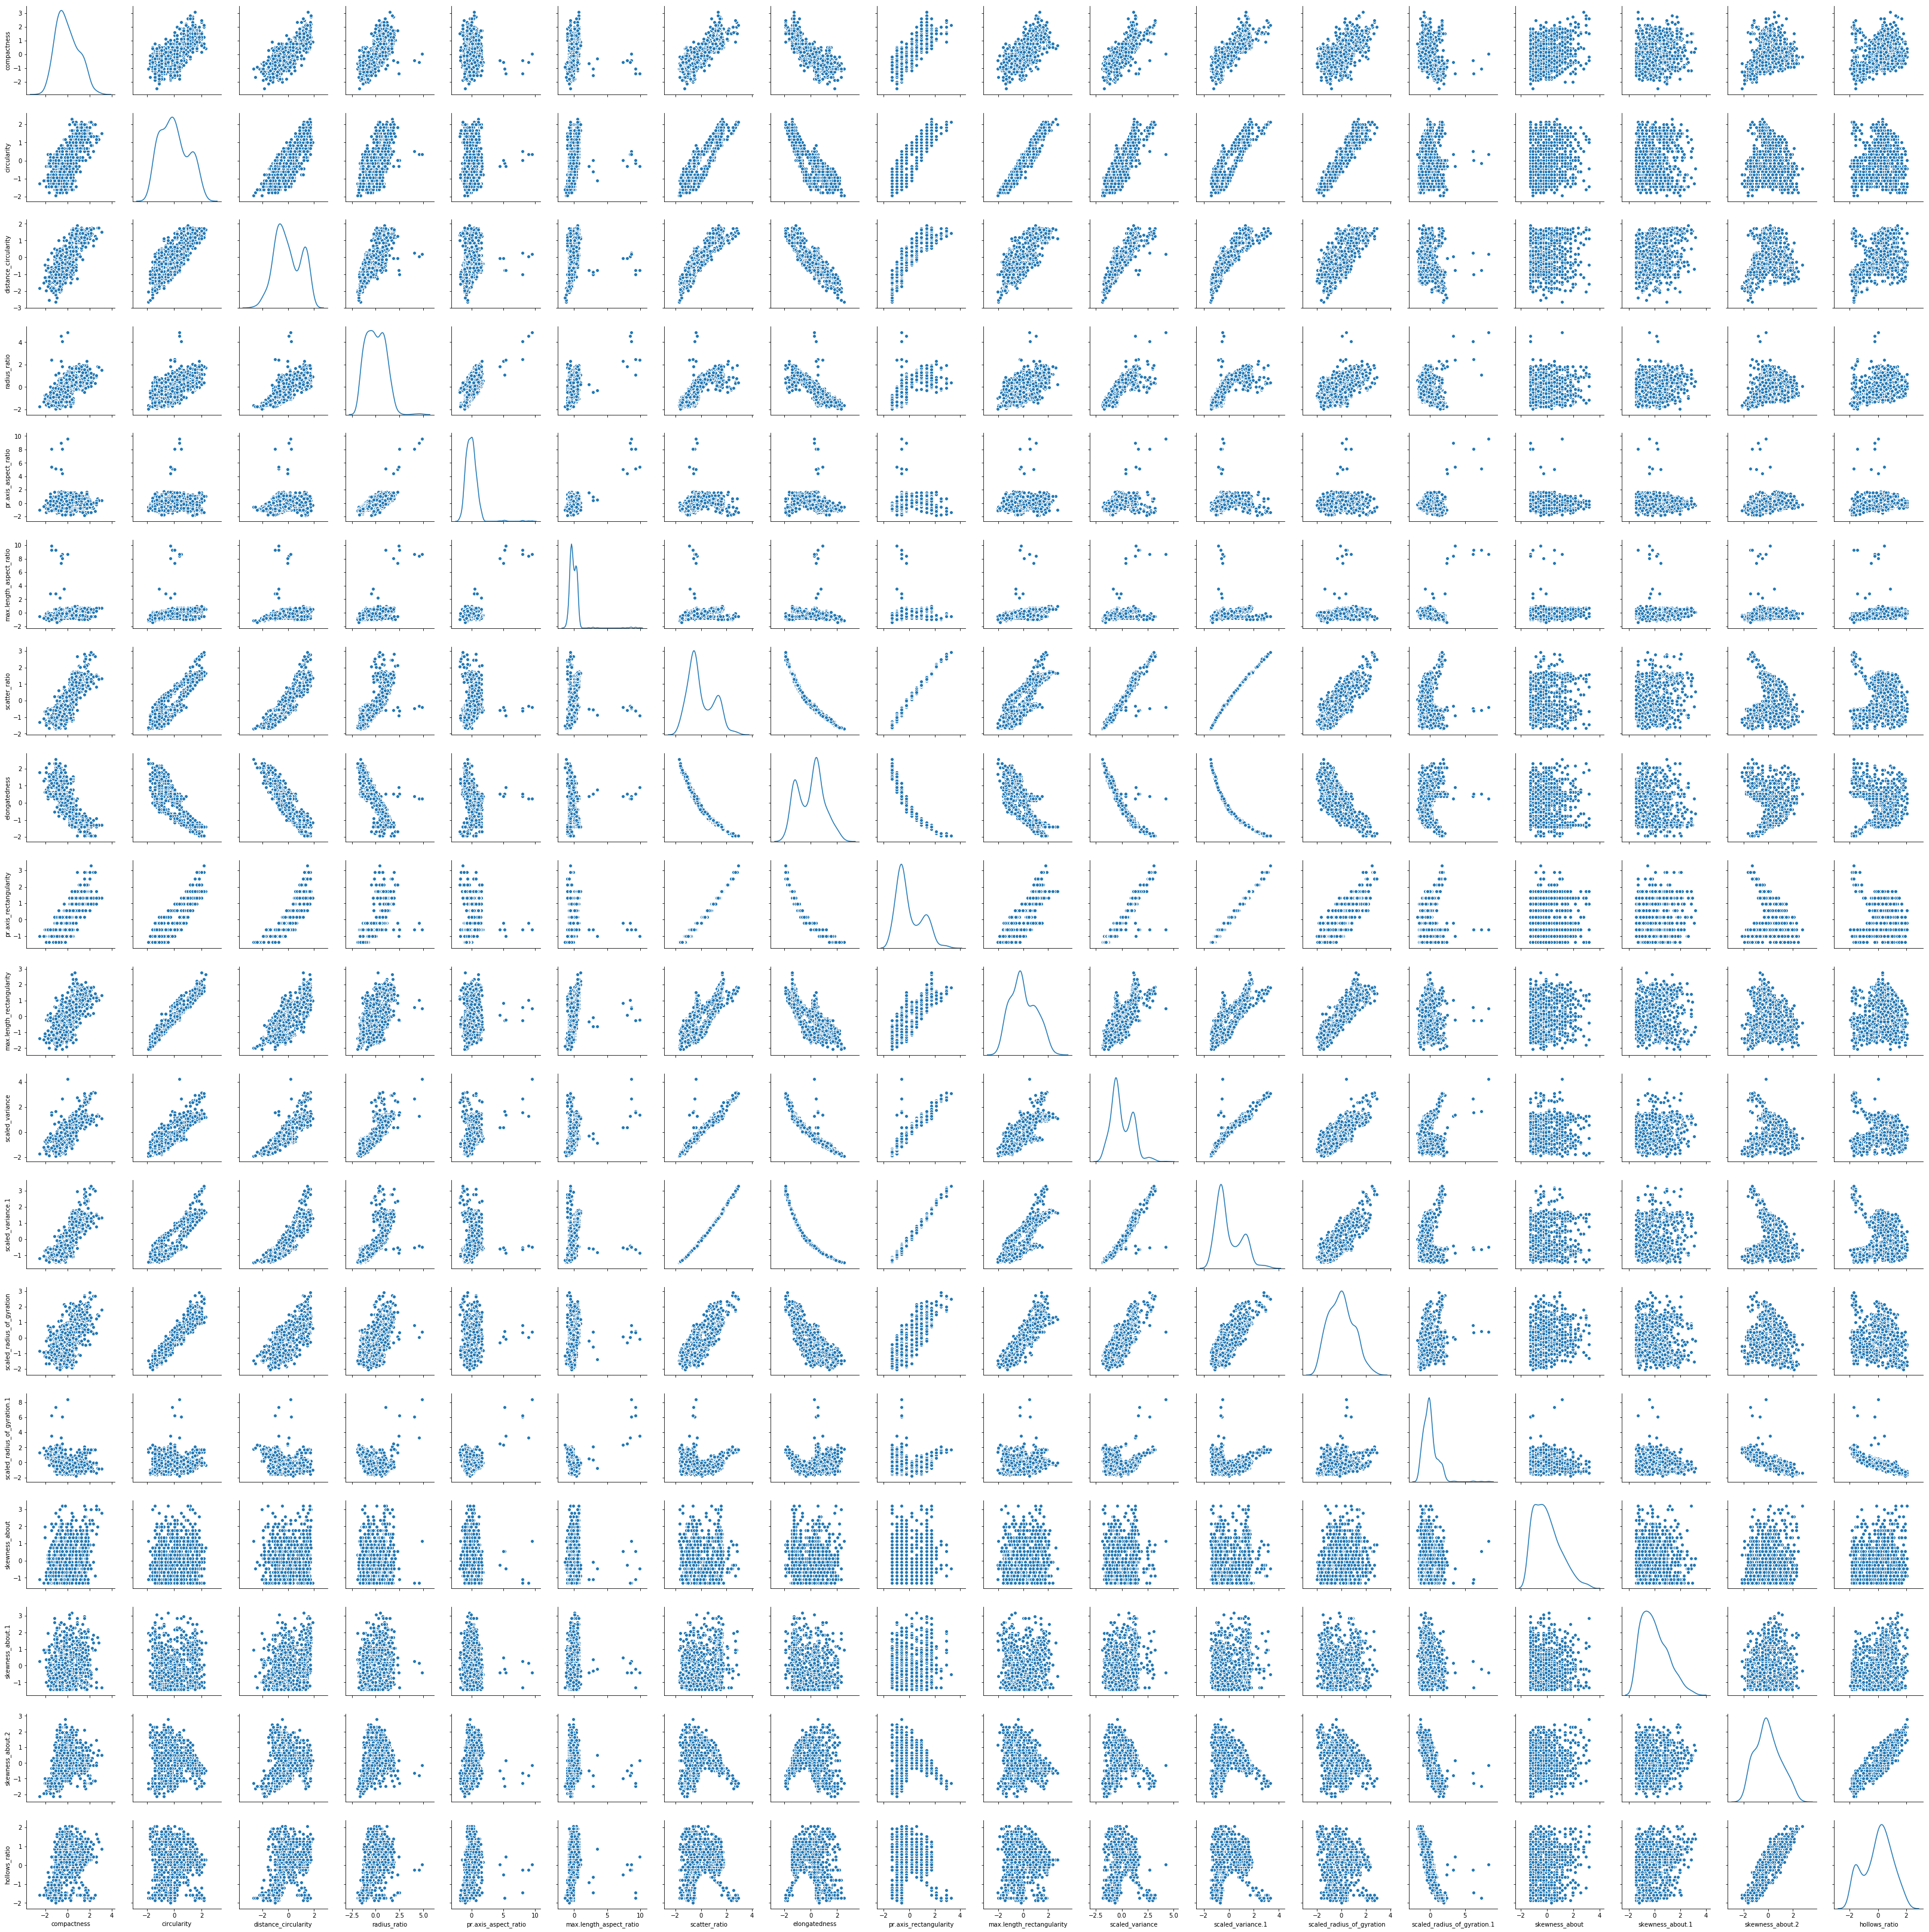

In [35]:
import seaborn as sns
sns.pairplot(vehicle_df_z, diag_kind='kde')

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance or `inertia`

You can refer `KMeans.fit().inertia_`

In [58]:
# From the above pairplot, I feel we should start with 3-6 clusters and there on decided.
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  distortion.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion } )
clusters_df[0:15]

num_clusters  cluster_errors
0             1    14634.000000
1             2     8623.136976
2             3     7037.467395
3             4     5739.201327
4             5     5186.753590
5             6     4706.560628
6             7     4355.139334
7             8     4108.767576
8             9     3882.723515

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [90]:
# As refering to the above elow graph, to me the optimal cluster value should be 3
vehicle_cluster = KMeans( n_clusters = 3, random_state = 2354 )
vehicle_cluster.fit(vehicle_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [91]:
centroids = vehicle_cluster.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [92]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_df_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.233962    -0.573875             -0.307769     -0.030413   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.919871    -0.520093             -0.893208     -1.064356   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.205073                -0.116532      -0.459042   
1              0.215052                 0.342508       1.271805   
2             -0.500422                -0.219074      -0.779121   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.325063               -0.487988                  -0.536044   
1      -1.190612                1.275484                   1.092668   
2       0.865893               -0.745356                  -0.484632   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.413809          -0.463663                  -0.601550   
1         1.220381           1.281327                   1.079542   
2        -0.782403          -0.783411                  -0.384982   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.619241       -0.061780          0.010668   
1                    -0.028795        0.162290          0.265665   
2                     0.838787       -0.095243         -0.301716   

   skewness_about.2  hollows_ratio  
0          0.812786       0.698973  
1         -0.005356       0.183801  
2         -1.054206      -1.110695

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [93]:
vehicle_label = vehicle_cluster.labels_

In [94]:
vehicle_label_df = pd.DataFrame(vehicle_label, columns = ["label"])

In [95]:
vehicle_label_df['label'].value_counts()

0    313
1    260
2    240
Name: label, dtype: int64

In [ ]:
# With the initail class col. we have seen the below distribution.
#car    413
#bus    205
#van    195
# Based on the clustering done, seems the values are very close to what is the actual data.